<a href="https://colab.research.google.com/github/Sriharshitha842/DWDM_LAB/blob/main/DWDM_LAB15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NAME OF THE STUDENT : SRIHARSHITHA D**
## **REG NO : 19BCD7246**
## **COURSE CODE : CSE4005**
## **LAB NO : 15**

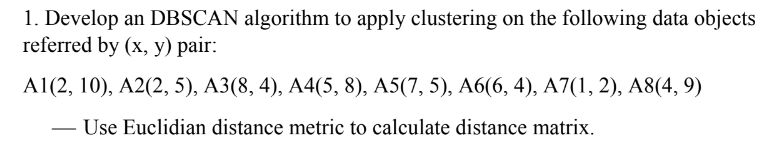

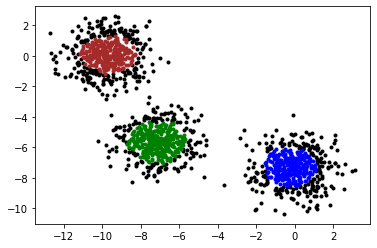

In [8]:
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


def dbscan(data, eps, minPts):
    corePoint = []  # Core points array
    reachable = []  # Reachble points
    cluster = [0] * len(data)  # Clusters number array
    tempVisited = []  # Template visited array
    visited = []  # Visited points
    cl = 1  # Cluster number
    point = -1
    for i in range(len(data)):
        nclus = 0
        if not i in visited:

            tempVisited.append(i)  # Visited spots by a point
            sign = 0  # Check search for new cluster
            visited.append(i)
            while len(tempVisited) != 0:
                n = 0  # neighbor point number by a point
                if sign == 0:
                    point = i
                else:
                    point = tempVisited.pop()
                    visited.append(point)
                    if point == i:
                        break
                noisy = []
                c = 0
                for j in range(len(data)):

                    if point != j:

                        if distance(data[point], data[j]) <= eps:
                            if not (j in reachable or j in visited):
                                tempVisited.append(j)
                                c += 1

                            if j in visited and cluster[j] == 0:
                                noisy.append(j)

                            n += 1

                if n >= minPts and len(tempVisited) + len(noisy) >= minPts:
                    sign = 1
                    nclus = 1
                    corePoint.append(point)
                    cluster[point] = cl
                    assingCluster(noisy, cluster, cl)
                    assingCluster(tempVisited, cluster, cl)
                    assignReachable(tempVisited, reachable)
                elif sign != 1:
                    cluster[point] = 0  # Noisy point
                    tempVisited = []
                else:
                    for j in range(c):
                        tempVisited.pop()
        if nclus == 1:  # If new cluster found cl num uptade
            cl += 1

    return cluster, reachable, corePoint


def plotRes(data, cluster):
    clusterNum = max(cluster)
    scatterColors = ['pink', 'blue', 'green', 'brown', 'red', 'purple', 'orange', 'yellow', 'lime', 'peru', 'olive',
                     'gold', 'turquoise', 'tomato', 'lightcoral', 'khaki', 'seagreen', 'violet']
    for i in range(clusterNum + 1):
        if (i == 0):
            color = 'black'  # Paint noisy points to black
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = []
        y1 = []
        for j in range(len(data)):
            if cluster[j] == i:
                x1.append(data[j][0])
                y1.append(data[j][1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')


def distance(point1, point2):  # Calculate distance between two point
    return math.sqrt(pow(point1[0] - point2[0], 2) + pow(point1[1] - point2[1], 2))


def assingCluster(temp, clusterArray, cluster):  # Assign cluster to points
    for i in range(len(temp)):
        clusterArray[temp[i]] = cluster


def assignReachable(temp, reachable):  # Assign points as a reachable
    for i in range(len(temp)):
        if not temp[i] in reachable:
            reachable.append(temp[i])


data = [[2, 10],[2, 5],[8, 4],[5, 8],[7, 5],[6, 4],[1, 2],[4, 9]]
X, y = make_blobs(n_samples=1500, random_state=9)
reachable = []
cluster = []
corePoint = []
cluster, reachable, corePoint = dbscan(X, .5, 40)
plotRes(X, cluster)
plt.show()